In [27]:
import os, sys
import numpy as np, matplotlib.pyplot as plt, seaborn as sns

# Import utility functions and classes
from utils import *

# ggplot style
plt.style.use('ggplot')

In [33]:
gestures_map = {
    'nd': 'nod',
    'mnd': 'multiple nods',
    'fu': 'face-up',
    'fd': 'face-down',
    'sh': 'shake',
    't': 'turn',
    'ti': 'tilt'
}

gestures = list(gestures_map.keys())

In [29]:
fields = ['Rx', 'Ry', 'Rz']

# Load the MoCap dataset
loader = MoCapLoader(normalized=False)
_, y = loader.load(fields)

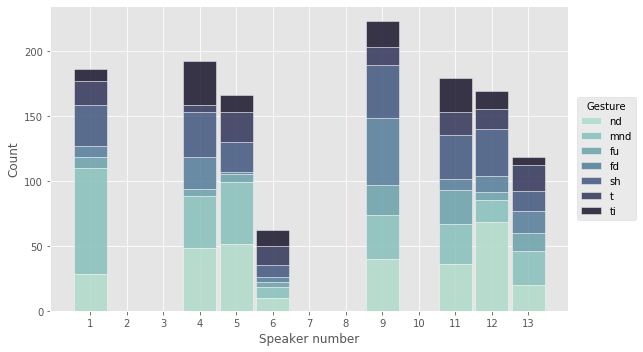

In [103]:
r = np.arange(len(names))
width = .9

colors = sns.cubehelix_palette(len(gestures), start=.2, rot=-.4, dark=0.1, light=.8)
counts = {gesture:np.zeros(len(names)) for gesture in gestures}

for i, (name, id_) in enumerate(names.items()):
    for gesture, name_ in y:
        if name == name_:
            counts[gesture][i] += 1
    
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(9, 5))

bottom = 0
i = 0
while i < len(gestures):
    g = gestures[i]
    ax.bar(r, counts[g], color=colors[i], edgecolor='white', width=width, label=g, alpha=.85, bottom=bottom)
    bottom += counts[g]
    i += 1

# Custom X axis
plt.xticks(r, range(1, 14))
plt.xlabel('Speaker number')
plt.ylabel('Count')
lgd = plt.legend(title='Gesture', loc='center right', ncol=1, bbox_to_anchor=(1.14, 0.5))
 
# Show graphic
plt.tight_layout()
plt.savefig('gesture-counts.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.show()